In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import os

# List of known classes
classes = ['Monkeypox', 'Chickenpox', 'Cowpox', 'HFMD', 'Healthy', 'Measles']

def count_images_in_each_class(folder_path, classes):
    class_counts = {cls: 0 for cls in classes}

    # Iterate over each fold
    for fold in os.listdir(folder_path):
        fold_path = os.path.join(folder_path, fold)
        
        # Check if it's a directory (we only care about directories)
        if os.path.isdir(fold_path):
            # Iterate over subfolders (Train, Test, Valid)
            for subfolder in ['Train', 'Test', 'Valid']:
                subfolder_path = os.path.join(fold_path, subfolder)
                
                # Check if the subfolder exists
                if os.path.isdir(subfolder_path):
                    # Iterate through all classes within the subfolder
                    for class_name in classes:
                        class_folder_path = os.path.join(subfolder_path, class_name)
                        
                        # If the class folder exists, count images inside it
                        if os.path.isdir(class_folder_path):
                            image_files = [f for f in os.listdir(class_folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
                            class_counts[class_name] += len(image_files)
    
    return class_counts

# Path to the "Original Images/FOLDS" folder
original_images_path = "/kaggle/input/mpox-skin-lesion-dataset-version-20-msld-v20/Original Images/Original Images/FOLDS"

# Count images for each class
class_distribution = count_images_in_each_class(original_images_path, classes)

# Print the number of images for each class
for class_name, count in class_distribution.items():
    print(f"Class '{class_name}' has {count} images.")


Class 'Monkeypox' has 1420 images.
Class 'Chickenpox' has 375 images.
Class 'Cowpox' has 330 images.
Class 'HFMD' has 805 images.
Class 'Healthy' has 570 images.
Class 'Measles' has 275 images.


In [2]:
import os

# Define the base path for Augmented Images folder
augmented_base_dir = "/kaggle/input/mpox-skin-lesion-dataset-version-20-msld-v20/Augmented Images/Augmented Images/FOLDS_AUG"

# Initialize a dictionary to store image counts per class for each fold
augmented_image_counts = {}

# Function to count images in a folder per class
def count_images_in_class(folder_path):
    class_counts = {}
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check for image file extensions
                # Extract class from folder name (which is the subfolder)
                class_name = os.path.basename(root)
                if class_name not in class_counts:
                    class_counts[class_name] = 0
                class_counts[class_name] += 1
    return class_counts

# Loop through each fold (fold1_AUG to fold5_AUG)
for fold in os.listdir(augmented_base_dir):
    fold_path = os.path.join(augmented_base_dir, fold)
    if os.path.isdir(fold_path):  # Only process directories
        # Count images in each class within the fold
        class_counts = count_images_in_class(fold_path)
        augmented_image_counts[fold] = class_counts

# Print the number of images per class for each fold in Augmented Images
print("Image counts per class in Augmented Images:")
for fold, class_counts in augmented_image_counts.items():
    print(f"\n{fold}:")
    for class_name, count in class_counts.items():
        print(f"  {class_name}: {count} images")


Image counts per class in Augmented Images:

fold5_AUG:
  HFMD: 1526 images
  Monkeypox: 2968 images
  Measles: 532 images
  Healthy: 1162 images
  Chickenpox: 742 images
  Cowpox: 602 images

fold3_AUG:
  HFMD: 1596 images
  Monkeypox: 3010 images
  Measles: 504 images
  Healthy: 1050 images
  Chickenpox: 714 images
  Cowpox: 658 images

fold1_AUG:
  HFMD: 1624 images
  Monkeypox: 2828 images
  Measles: 518 images
  Healthy: 1162 images
  Chickenpox: 700 images
  Cowpox: 686 images

fold2_AUG:
  HFMD: 1526 images
  Monkeypox: 2548 images
  Measles: 560 images
  Healthy: 1120 images
  Chickenpox: 714 images
  Cowpox: 658 images

fold4_AUG:
  HFMD: 1610 images
  Monkeypox: 2716 images
  Measles: 504 images
  Healthy: 1162 images
  Chickenpox: 728 images
  Cowpox: 616 images


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_model(input_shape=(224, 224, 3), num_classes=6):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


2025-04-29 20:44:54.984866: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745959495.172436      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745959495.226587      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [6]:
import os
import numpy as np
import cv2
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models

# Image loader function
def load_images_from_folder(folder_path, img_size=128):
    X, y = [], []
    for label in os.listdir(folder_path):
        label_path = os.path.join(folder_path, label)
        if not os.path.isdir(label_path): continue
        for file in os.listdir(label_path):
            file_path = os.path.join(label_path, file)
            img = cv2.imread(file_path)
            if img is not None:
                img = cv2.resize(img, (img_size, img_size))
                X.append(img)
                y.append(label)
    return np.array(X), np.array(y)

# Define CNN model
def build_model(num_classes, img_size=128):
    model = models.Sequential([
        layers.Input((img_size, img_size, 3)),
        layers.Conv2D(32, 3, activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Folder paths on Kaggle (adjust as per the actual paths on your setup)
orig_base = '/kaggle/input/mpox-skin-lesion-dataset-version-20-msld-v20/Original Images/Original Images/FOLDS'
aug_base = '/kaggle/input/mpox-skin-lesion-dataset-version-20-msld-v20/Augmented Images/Augmented Images/FOLDS_AUG'

le = LabelEncoder()
acc_per_fold = []

# K-Fold Cross-Validation Loop
for fold in range(1, 6):
    print(f"\n🔁 Training Fold {fold}")

    # Paths for original and augmented images for the current fold
    train_orig = os.path.join(orig_base, f'fold{fold}', 'Train')
    val_path   = os.path.join(orig_base, f'fold{fold}', 'Valid')
    test_path  = os.path.join(orig_base, f'fold{fold}', 'Test')
    train_aug  = os.path.join(aug_base, f'fold{fold}_AUG', 'Train')

    # Load images
    X_train_orig, y_train_orig = load_images_from_folder(train_orig)
    X_train_aug, y_train_aug   = load_images_from_folder(train_aug)
    X_train = np.concatenate((X_train_orig, X_train_aug))
    y_train = np.concatenate((y_train_orig, y_train_aug))

    X_val, y_val   = load_images_from_folder(val_path)
    X_test, y_test = load_images_from_folder(test_path)

    # Encode labels
    all_labels = np.concatenate((y_train, y_val, y_test))
    le.fit(all_labels)
    y_train = le.transform(y_train)
    y_val   = le.transform(y_val)
    y_test  = le.transform(y_test)

    # Shuffle the training data
    X_train, y_train = shuffle(X_train, y_train, random_state=fold)

    # Build the model
    model = build_model(num_classes=len(le.classes_))

    # Train the model
    model.fit(X_train, y_train, epochs=5, batch_size=32,
              validation_data=(X_val, y_val), verbose=1)

    # Evaluate the model
    score = model.evaluate(X_test, y_test, verbose=0)
    print(f"✅ Fold {fold} Accuracy: {score[1]*100:.2f}%")
    acc_per_fold.append(score[1]*100)

# Final accuracy report
print("\n📊 Final Accuracy across folds:", acc_per_fold)
print("📈 Average Accuracy:", np.mean(acc_per_fold))



🔁 Training Fold 1


I0000 00:00:1745960205.616451      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1745960205.617144      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Epoch 1/5


I0000 00:00:1745960209.372926      99 service.cc:148] XLA service 0x7a239c002d10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745960209.373569      99 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1745960209.373592      99 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1745960209.594519      99 cuda_dnn.cc:529] Loaded cuDNN version 90300


 15/252 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.1650 - loss: 1033.4825

I0000 00:00:1745960212.216919      99 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


252/252 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.3487 - loss: 160.7690 - val_accuracy: 0.3958 - val_loss: 1.6269
Epoch 2/5
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5506 - loss: 1.2812 - val_accuracy: 0.3750 - val_loss: 1.9806
Epoch 3/5
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6688 - loss: 0.9565 - val_accuracy: 0.3889 - val_loss: 2.2659
Epoch 4/5
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7385 - loss: 0.7543 - val_accuracy: 0.3611 - val_loss: 2.1135
Epoch 5/5
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8094 - loss: 0.5938 - val_accuracy: 0.4028 - val_loss: 2.9856
✅ Fold 1 Accuracy: 37.84%

🔁 Training Fold 2
Epoch 1/5
239/239 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.3372 - loss: 75.8745 - val_accuracy: 0.4756 - val_loss: 1.5505
Epoch 2/5
239/239 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5075 - loss: 1.3722 - val_accuracy: 0.4817 - val_loss: 1.6634
Epoch 3/5
239/239 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0

In [8]:
import os
import numpy as np
import cv2
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models

# Image loader function
def load_images_from_folder(folder_path, img_size=128):
    X, y = [], []
    for label in os.listdir(folder_path):
        label_path = os.path.join(folder_path, label)
        if not os.path.isdir(label_path): continue
        for file in os.listdir(label_path):
            file_path = os.path.join(label_path, file)
            img = cv2.imread(file_path)
            if img is not None:
                img = cv2.resize(img, (img_size, img_size))
                X.append(img)
                y.append(label)
    return np.array(X), np.array(y)

# Define advanced CNN model using ResNet50V2 without pre-trained weights
def build_advanced_model(num_classes, img_size=128):
    base_model = tf.keras.applications.ResNet50V2(
        include_top=False, 
        weights=None,  # No pre-trained weights
        input_shape=(img_size, img_size, 3)
    )
    base_model.trainable = True  # Train the entire model from scratch

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),  # Dropout to reduce overfitting
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Folder paths on Kaggle (adjust as per the actual paths on your setup)
orig_base = '/kaggle/input/mpox-skin-lesion-dataset-version-20-msld-v20/Original Images/Original Images/FOLDS'
aug_base = '/kaggle/input/mpox-skin-lesion-dataset-version-20-msld-v20/Augmented Images/Augmented Images/FOLDS_AUG'

le = LabelEncoder()
acc_per_fold = []

# K-Fold Cross-Validation Loop
for fold in range(1, 6):
    print(f"\n🔁 Training Fold {fold}")

    # Paths for original and augmented images for the current fold
    train_orig = os.path.join(orig_base, f'fold{fold}', 'Train')
    val_path   = os.path.join(orig_base, f'fold{fold}', 'Valid')
    test_path  = os.path.join(orig_base, f'fold{fold}', 'Test')
    train_aug  = os.path.join(aug_base, f'fold{fold}_AUG', 'Train')

    # Load images
    X_train_orig, y_train_orig = load_images_from_folder(train_orig)
    X_train_aug, y_train_aug   = load_images_from_folder(train_aug)
    X_train = np.concatenate((X_train_orig, X_train_aug))
    y_train = np.concatenate((y_train_orig, y_train_aug))

    X_val, y_val   = load_images_from_folder(val_path)
    X_test, y_test = load_images_from_folder(test_path)

    # Encode labels
    all_labels = np.concatenate((y_train, y_val, y_test))
    le.fit(all_labels)
    y_train = le.transform(y_train)
    y_val   = le.transform(y_val)
    y_test  = le.transform(y_test)

    # Shuffle the training data
    X_train, y_train = shuffle(X_train, y_train, random_state=fold)

    # Build the advanced model
    model = build_advanced_model(num_classes=len(le.classes_))

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=64,
              validation_data=(X_val, y_val), verbose=1)

    # Evaluate the model
    score = model.evaluate(X_test, y_test, verbose=0)
    print(f"✅ Fold {fold} Accuracy: {score[1]*100:.2f}%")
    acc_per_fold.append(score[1]*100)

# Final accuracy report
print("\n📊 Final Accuracy across folds:", acc_per_fold)
print("📈 Average Accuracy:", np.mean(acc_per_fold))



🔁 Training Fold 1
Epoch 1/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 118s 436ms/step - accuracy: 0.4005 - loss: 1.7933 - val_accuracy: 0.1736 - val_loss: 206.7053
Epoch 2/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 24s 188ms/step - accuracy: 0.5373 - loss: 1.2912 - val_accuracy: 0.3958 - val_loss: 2.3256
Epoch 3/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 25s 195ms/step - accuracy: 0.5888 - loss: 1.1354 - val_accuracy: 0.2153 - val_loss: 12.3523
Epoch 4/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 23s 185ms/step - accuracy: 0.6216 - loss: 1.0467 - val_accuracy: 0.3264 - val_loss: 5.9892
Epoch 5/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 23s 184ms/step - accuracy: 0.6793 - loss: 0.9144 - val_accuracy: 0.2222 - val_loss: 4.3944
Epoch 6/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 24s 188ms/step - accuracy: 0.7212 - loss: 0.7839 - val_accuracy: 0.2917 - val_loss: 2.7204
Epoch 7/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 24s 188ms/step - accuracy: 0.7536 - loss: 0.6682 - val_accuracy: 0.4583 - val_loss: 3.8580
Epoch 8/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 24s 187ms/step - acc

In [9]:
import os
import numpy as np
import cv2
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

# 1) Image loader
def load_images_from_folder(folder_path, img_size=128):
    X, y = [], []
    for label in os.listdir(folder_path):
        class_dir = os.path.join(folder_path, label)
        if not os.path.isdir(class_dir): continue
        for fname in os.listdir(class_dir):
            img = cv2.imread(os.path.join(class_dir, fname))
            if img is None: continue
            img = cv2.resize(img, (img_size, img_size))
            X.append(img); y.append(label)
    return np.array(X), np.array(y)

# 2) A basic Residual Block
def residual_block(x, filters, kernel_size=3, stride=1):
    shortcut = x
    x = layers.Conv2D(filters, kernel_size, strides=stride, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(filters, kernel_size, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)

    if stride != 1 or shortcut.shape[-1] != filters:
        shortcut = layers.Conv2D(filters, 1, strides=stride, padding='same', use_bias=False)(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    x = layers.Add()([x, shortcut])
    return layers.ReLU()(x)

# 3) Build deeper model from scratch
def build_complex_model(num_classes, img_size=128):
    inp = layers.Input((img_size, img_size, 3))
    x = layers.Conv2D(64, 7, strides=2, padding='same', use_bias=False)(inp)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D(3, strides=2, padding='same')(x)

    # Stacks of residual blocks
    for filters, blocks, stride in [(64, 2, 1), (128, 2, 2), (256, 3, 2), (512, 2, 2)]:
        for i in range(blocks):
            x = residual_block(x, filters, stride=stride if i==0 else 1)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    out = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inp, out)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# 4) Paths (exactly as in your last snippet)
orig_base = '/kaggle/input/mpox-skin-lesion-dataset-version-20-msld-v20/Original Images/Original Images/FOLDS'
aug_base  = '/kaggle/input/mpox-skin-lesion-dataset-version-20-msld-v20/Augmented Images/Augmented Images/FOLDS_AUG'

le = LabelEncoder()
acc_per_fold = []

# 5) K-Fold loop with callbacks & on-the-fly augmentation
for fold in range(1, 6):
    print(f"\n=== Fold {fold} ===")

    # load original+augmented train
    X_o, y_o = load_images_from_folder(os.path.join(orig_base, f'fold{fold}', 'Train'))
    X_a, y_a = load_images_from_folder(os.path.join(aug_base, f'fold{fold}_AUG', 'Train'))
    X_train = np.concatenate([X_o, X_a]); y_train = np.concatenate([y_o, y_a])

    # load val & test
    X_val, y_val = load_images_from_folder(os.path.join(orig_base, f'fold{fold}', 'Valid'))
    X_test, y_test = load_images_from_folder(os.path.join(orig_base, f'fold{fold}', 'Test'))

    # encode
    all_labels = np.concatenate([y_train, y_val, y_test])
    le.fit(all_labels)
    y_train = le.transform(y_train)
    y_val   = le.transform(y_val)
    y_test  = le.transform(y_test)

    # shuffle train
    X_train, y_train = shuffle(X_train, y_train, random_state=fold)

    # data augmentation generator
    datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=15, width_shift_range=0.1, height_shift_range=0.1,
        zoom_range=0.1, horizontal_flip=True, vertical_flip=True
    )
    datagen.fit(X_train)

    # build & fit model
    model = build_complex_model(num_classes=len(le.classes_), img_size=128)
    cb = [
        callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6),
        callbacks.EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
    ]
    model.fit(
        datagen.flow(X_train, y_train, batch_size=64),
        epochs=30,
        validation_data=(X_val, y_val),
        callbacks=cb,
        verbose=1
    )

    # evaluate
    score = model.evaluate(X_test, y_test, verbose=0)
    print(f"Fold {fold} ▶ Test Accuracy: {score[1]*100:.2f}%")
    acc_per_fold.append(score[1]*100)

# 6) Final report
print("\n▶ Accuracies per fold:", acc_per_fold)
print("▶ Mean accuracy: %.2f%%" % np.mean(acc_per_fold))



=== Fold 1 ===
Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


126/126 ━━━━━━━━━━━━━━━━━━━━ 67s 301ms/step - accuracy: 0.2784 - loss: 2.2963 - val_accuracy: 0.2222 - val_loss: 63.4851 - learning_rate: 0.0010
Epoch 2/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 26s 194ms/step - accuracy: 0.4354 - loss: 1.6275 - val_accuracy: 0.2986 - val_loss: 4.0154 - learning_rate: 0.0010
Epoch 3/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 26s 193ms/step - accuracy: 0.4869 - loss: 1.4479 - val_accuracy: 0.3333 - val_loss: 6.0549 - learning_rate: 0.0010
Epoch 4/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 26s 197ms/step - accuracy: 0.5171 - loss: 1.3905 - val_accuracy: 0.3889 - val_loss: 2.2243 - learning_rate: 0.0010
Epoch 5/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 26s 194ms/step - accuracy: 0.5132 - loss: 1.3341 - val_accuracy: 0.4097 - val_loss: 2.1020 - learning_rate: 0.0010
Epoch 6/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 26s 196ms/step - accuracy: 0.5149 - loss: 1.3411 - val_accuracy: 0.4792 - val_loss: 1.6161 - learning_rate: 0.0010
Epoch 7/30
126/126 ━━━━━━━━━━━━━━━━━━━━ 26s 193ms/step - accuracy: 0.5609 - loss

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


120/120 ━━━━━━━━━━━━━━━━━━━━ 60s 298ms/step - accuracy: 0.2550 - loss: 2.3739 - val_accuracy: 0.1524 - val_loss: 115.5667 - learning_rate: 0.0010
Epoch 2/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 25s 195ms/step - accuracy: 0.3573 - loss: 1.8087 - val_accuracy: 0.1646 - val_loss: 37.3243 - learning_rate: 0.0010
Epoch 3/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 25s 196ms/step - accuracy: 0.4339 - loss: 1.5802 - val_accuracy: 0.3476 - val_loss: 2.9336 - learning_rate: 0.0010
Epoch 4/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 25s 196ms/step - accuracy: 0.4545 - loss: 1.4768 - val_accuracy: 0.2866 - val_loss: 16.9169 - learning_rate: 0.0010
Epoch 5/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 25s 197ms/step - accuracy: 0.4941 - loss: 1.3567 - val_accuracy: 0.5305 - val_loss: 1.3411 - learning_rate: 0.0010
Epoch 6/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 25s 197ms/step - accuracy: 0.5009 - loss: 1.3495 - val_accuracy: 0.5183 - val_loss: 1.3145 - learning_rate: 0.0010
Epoch 7/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 25s 195ms/step - accuracy: 0.5450 - l

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


127/127 ━━━━━━━━━━━━━━━━━━━━ 63s 286ms/step - accuracy: 0.2865 - loss: 2.3261 - val_accuracy: 0.1765 - val_loss: 13.1051 - learning_rate: 0.0010
Epoch 2/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 26s 195ms/step - accuracy: 0.4363 - loss: 1.6705 - val_accuracy: 0.3333 - val_loss: 2.9682 - learning_rate: 0.0010
Epoch 3/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 26s 192ms/step - accuracy: 0.4889 - loss: 1.4665 - val_accuracy: 0.1895 - val_loss: 3.6276 - learning_rate: 0.0010
Epoch 4/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 26s 194ms/step - accuracy: 0.3924 - loss: 1.6813 - val_accuracy: 0.3595 - val_loss: 2.9744 - learning_rate: 0.0010
Epoch 5/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 26s 197ms/step - accuracy: 0.5053 - loss: 1.4114 - val_accuracy: 0.3595 - val_loss: 2.3991 - learning_rate: 0.0010
Epoch 6/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 26s 193ms/step - accuracy: 0.5363 - loss: 1.3085 - val_accuracy: 0.3922 - val_loss: 2.5422 - learning_rate: 0.0010
Epoch 7/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 26s 194ms/step - accuracy: 0.5608 - loss

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


123/123 ━━━━━━━━━━━━━━━━━━━━ 62s 303ms/step - accuracy: 0.2818 - loss: 2.3451 - val_accuracy: 0.1467 - val_loss: 65.5089 - learning_rate: 0.0010
Epoch 2/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 25s 194ms/step - accuracy: 0.3953 - loss: 1.6965 - val_accuracy: 0.3400 - val_loss: 13.5826 - learning_rate: 0.0010
Epoch 3/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 26s 196ms/step - accuracy: 0.4549 - loss: 1.5340 - val_accuracy: 0.2600 - val_loss: 61.7253 - learning_rate: 0.0010
Epoch 4/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 25s 195ms/step - accuracy: 0.4826 - loss: 1.4761 - val_accuracy: 0.4467 - val_loss: 3.8731 - learning_rate: 0.0010
Epoch 5/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 25s 195ms/step - accuracy: 0.5178 - loss: 1.3625 - val_accuracy: 0.4600 - val_loss: 1.8154 - learning_rate: 0.0010
Epoch 6/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 26s 196ms/step - accuracy: 0.5173 - loss: 1.3379 - val_accuracy: 0.4267 - val_loss: 14.2372 - learning_rate: 0.0010
Epoch 7/30
123/123 ━━━━━━━━━━━━━━━━━━━━ 25s 195ms/step - accuracy: 0.5530 - l

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


127/127 ━━━━━━━━━━━━━━━━━━━━ 60s 275ms/step - accuracy: 0.2552 - loss: 2.3139 - val_accuracy: 0.1364 - val_loss: 370.6879 - learning_rate: 0.0010
Epoch 2/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 26s 196ms/step - accuracy: 0.4223 - loss: 1.6678 - val_accuracy: 0.1364 - val_loss: 48.7241 - learning_rate: 0.0010
Epoch 3/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 26s 194ms/step - accuracy: 0.4848 - loss: 1.4901 - val_accuracy: 0.2468 - val_loss: 8.7377 - learning_rate: 0.0010
Epoch 4/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 26s 195ms/step - accuracy: 0.4865 - loss: 1.4015 - val_accuracy: 0.3052 - val_loss: 2.2300 - learning_rate: 0.0010
Epoch 5/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 26s 193ms/step - accuracy: 0.5351 - loss: 1.2712 - val_accuracy: 0.2987 - val_loss: 2.4153 - learning_rate: 0.0010
Epoch 6/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 26s 192ms/step - accuracy: 0.5647 - loss: 1.2309 - val_accuracy: 0.3442 - val_loss: 20.9335 - learning_rate: 0.0010
Epoch 7/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 26s 195ms/step - accuracy: 0.5567 - l

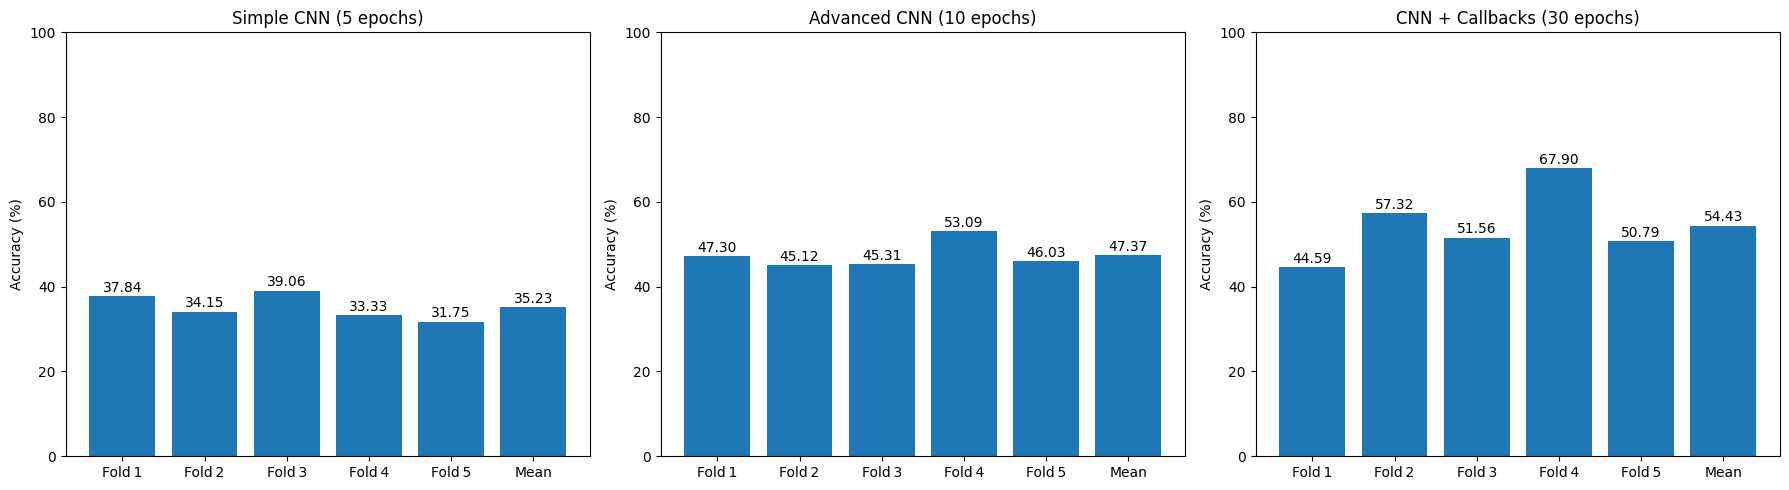

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# ── your three models’ per-fold accuracies ──
acc_simple = [37.837839126586914, 34.14634168148041, 39.0625, 33.33333432674408, 31.74603283405304]
acc_advanced = [47.297295928001404, 45.121949911117554, 45.3125, 53.08641791343689, 46.0317462682724]
acc_callbacks = [44.594594836235046, 57.31707215309143, 51.5625, 67.90123581886292, 50.79365372657776]

# compute means
mean_simple    = np.mean(acc_simple)
mean_advanced  = np.mean(acc_advanced)
mean_callbacks = np.mean(acc_callbacks)

# append mean to each list
acc_simple.append(mean_simple)
acc_advanced.append(mean_advanced)
acc_callbacks.append(mean_callbacks)

# labels for the 6 columns
labels = ['Fold 1','Fold 2','Fold 3','Fold 4','Fold 5','Mean']

# set up a 1×3 figure
fig, axes = plt.subplots(1, 3, figsize=(18, 5), tight_layout=True)

for ax, acc, title in zip(
    axes,
    [acc_simple, acc_advanced, acc_callbacks],
    ['Simple CNN (5 epochs)', 'Advanced CNN (10 epochs)', 'CNN + Callbacks (30 epochs)']
):
    # bar plot
    ax.bar(labels, acc)
    ax.set_ylim(0, 100)
    ax.set_title(title)
    ax.set_ylabel('Accuracy (%)')
    # annotate each bar with its value
    for i, v in enumerate(acc):
        ax.text(i, v + 1, f"{v:.2f}", ha='center')

plt.show()
